In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('earthquakes.csv')

Categorical Data

In [ ]:
# A 7.5 magnitude earthquake on September 28, 2018 near Palu, Indonesia caused a devastating tsunami afterwards.
# Let's take a look at some visualizations to understand
# what magTypes are used in Indonesia,
# the range of magnitudes there,
# and how many of the earthquakes are accompanied by a tsunami.

quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


Strip Plot

<Axes: xlabel='magType', ylabel='mag'>

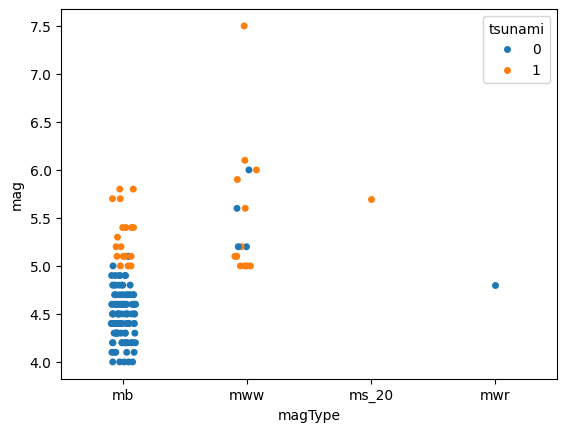

In [ ]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

Swarm Plot

<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


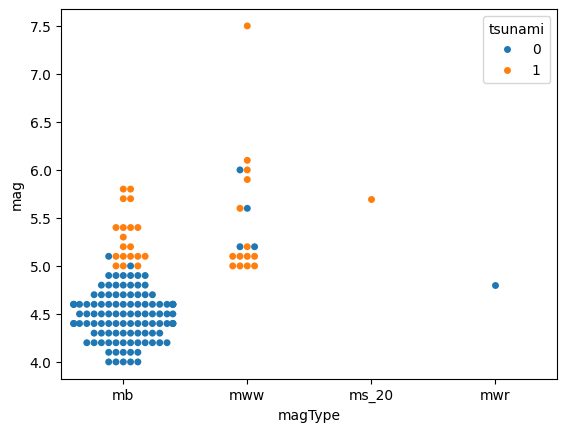

In [ ]:
# The bee swarm plot helps address this issue be keeping the points from overlapping.

sns.swarmplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)

Correlations and Heatmaps

In [ ]:
# heatmap

<Axes: >

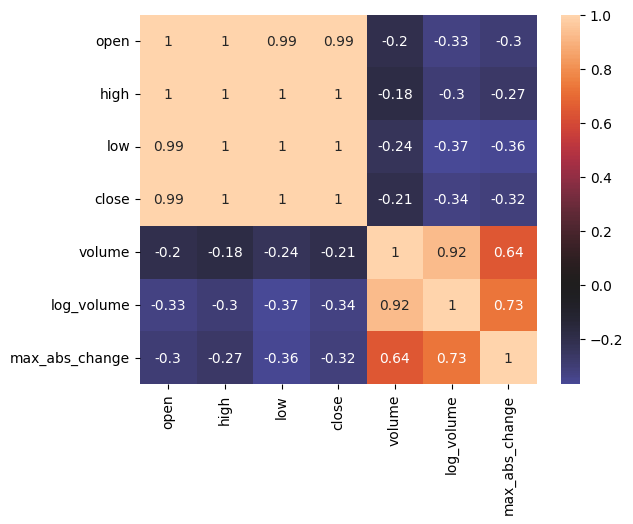

In [ ]:
# An easier way to create correlation matrix is to use seaborn

sns.heatmap(
 fb.sort_index().assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).corr(),annot=True, center=0)

Pair Plots

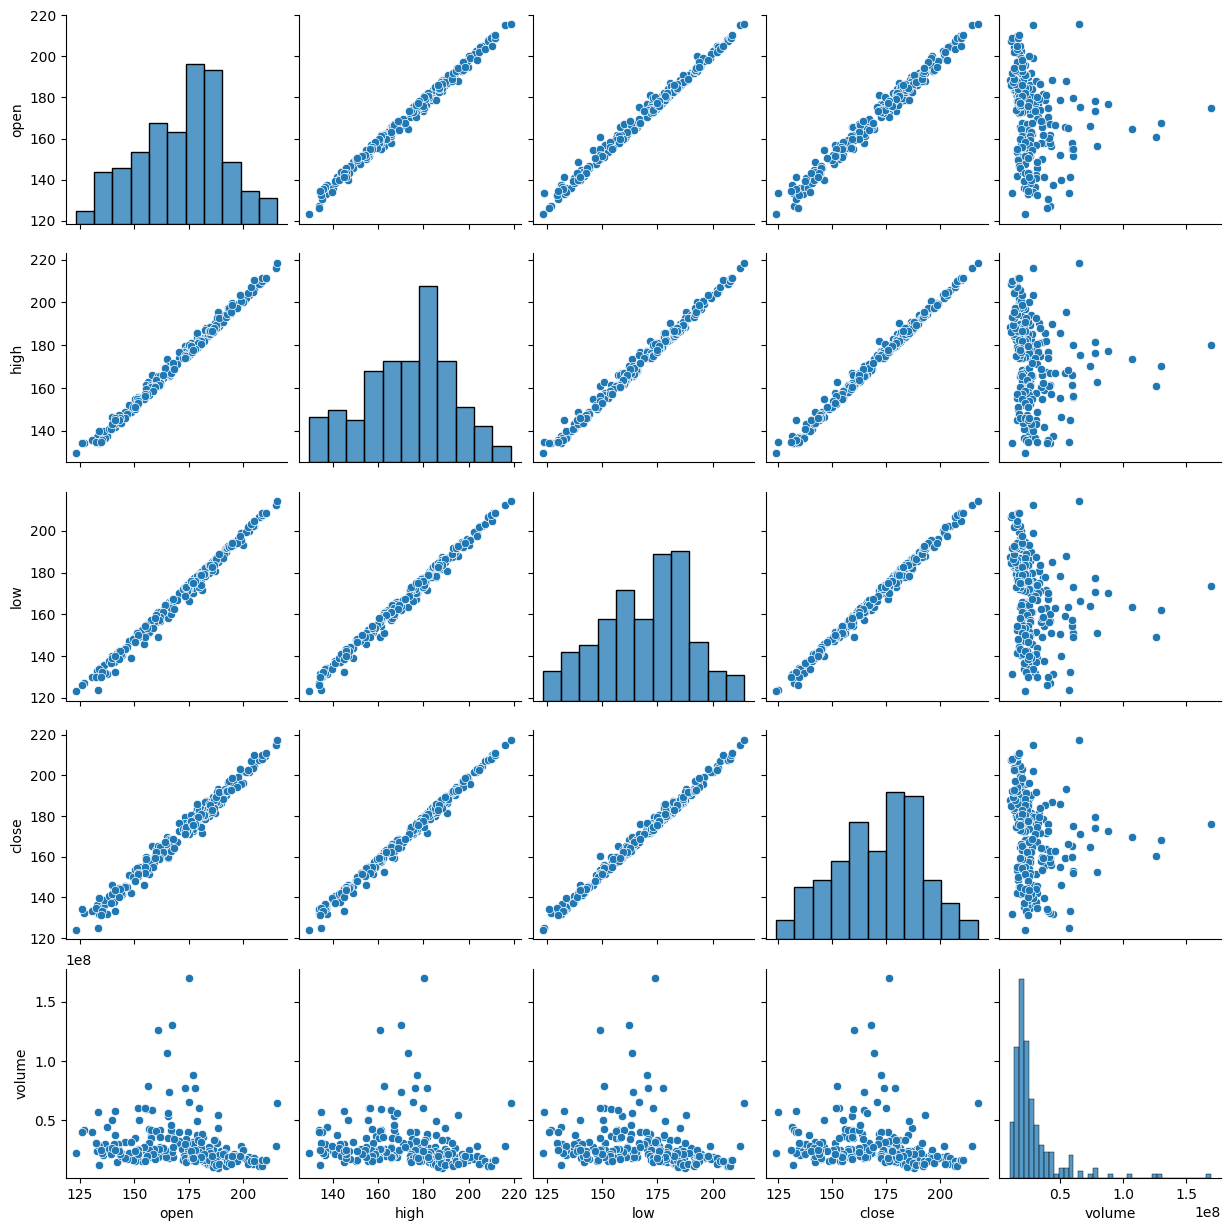

In [ ]:
# Similar to pandas scatter matrix

sns.pairplot(fb)

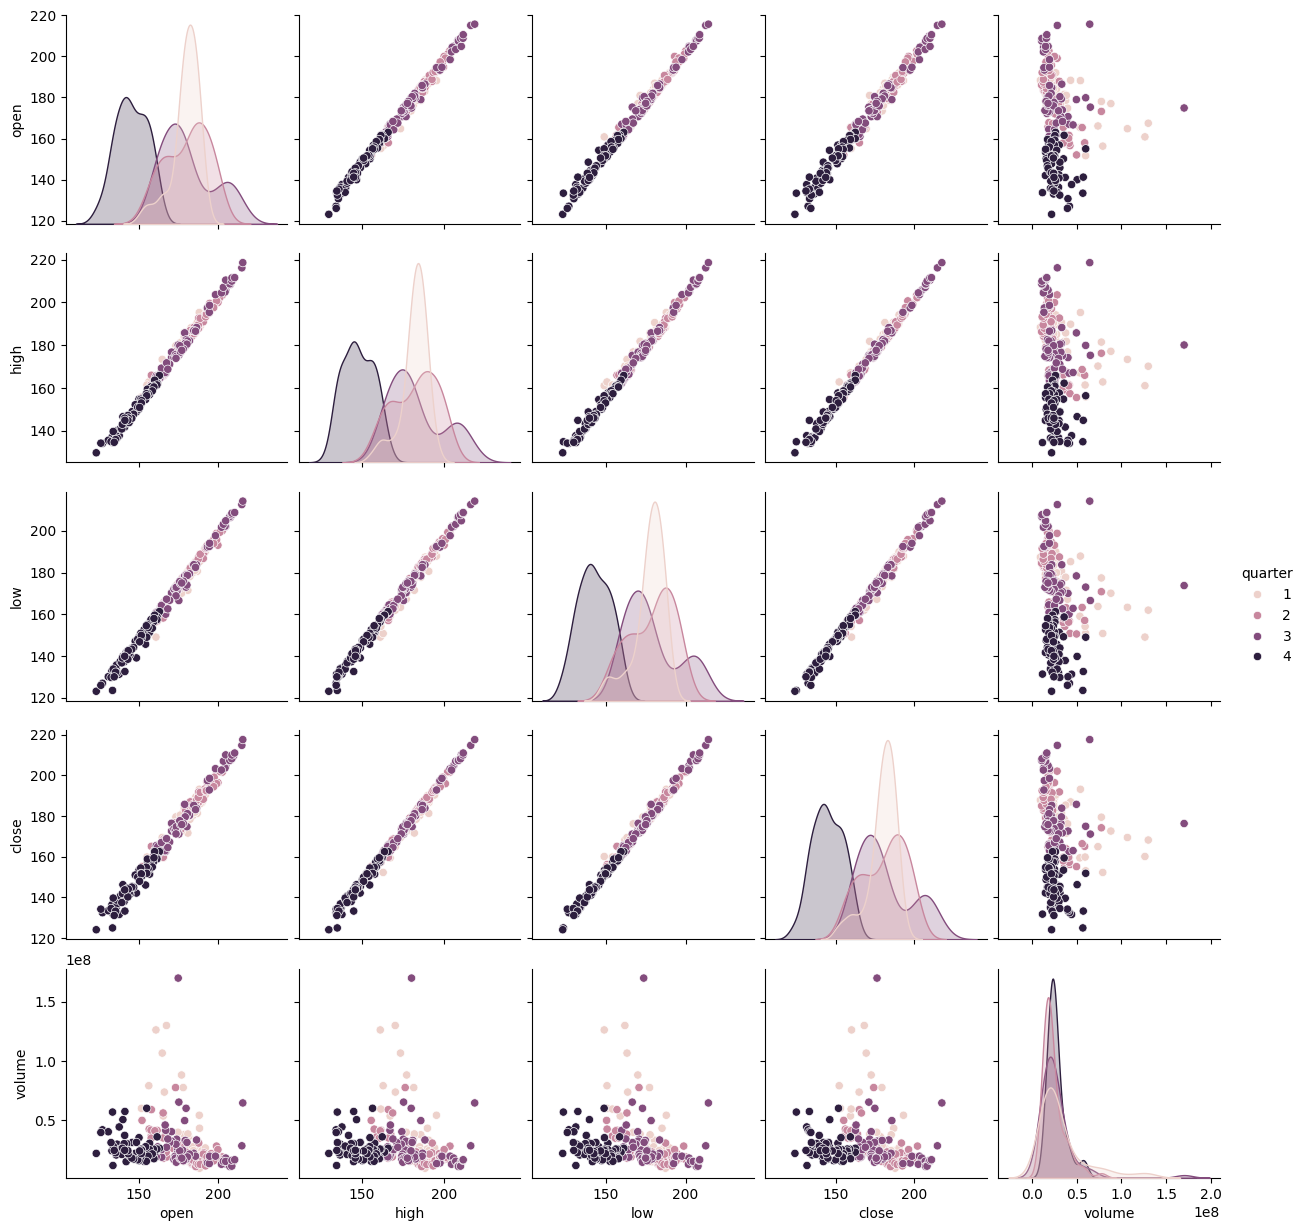

In [ ]:
# Seaborn also allows us to change color
# based on another column or data with similar shape

sns.pairplot(
 fb.assign(quarter=lambda x: x.index.quarter),
 diag_kind='kde',
 hue='quarter'
)

Joint Plot

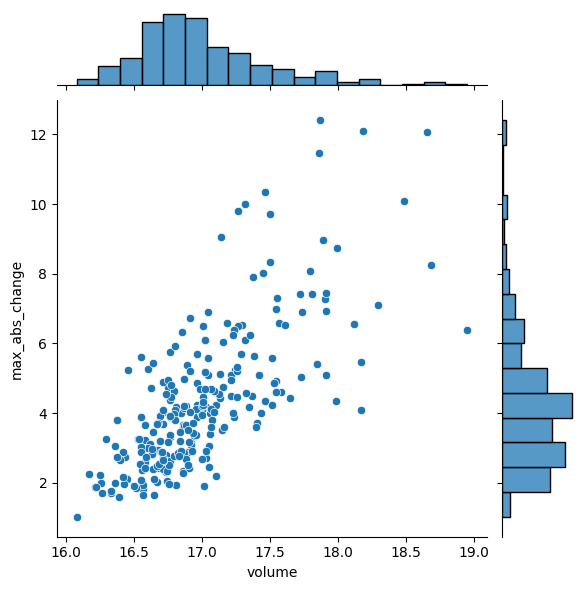

In [ ]:
# The joint plot allows us to visualize the relationship between two variables, like a scatter plot.
# However, we get the added benefit of being able to visualize their distributions at the same time (as a histogram or KDE)

sns.jointplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low)
)

In [ ]:
# By changing the kind argument, we can change how the center of the plot is displayed.

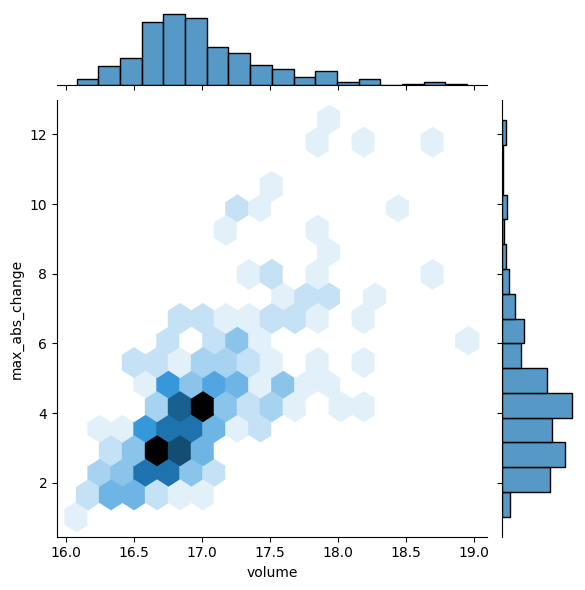

In [ ]:
# kind ='hex'

sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='hex',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low)
)

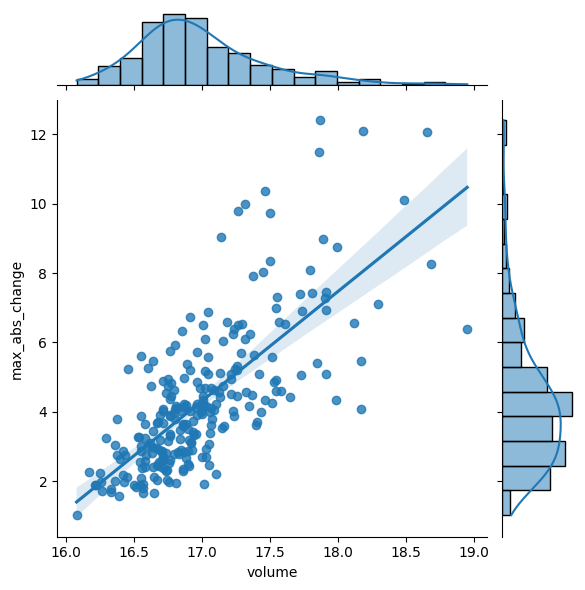

In [ ]:
# Kind = 'reg'

sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='reg',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low)
)

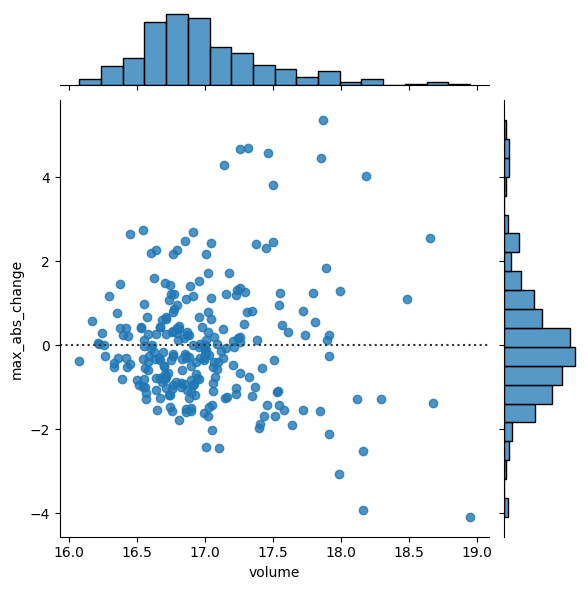

In [ ]:
# kind='resid'

sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='resid',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low)
)

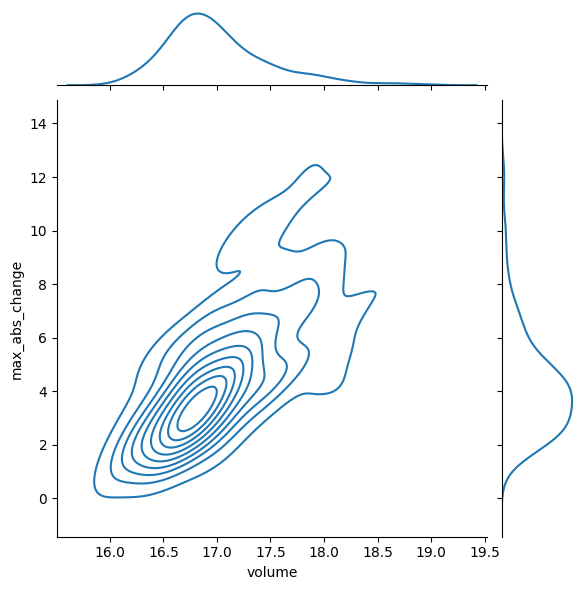

In [ ]:
# kind = 'kde'

sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='kde',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low)
)

Regression Plots

In [ ]:
# visualize a linear regression between
# the log of the volume traded in Facebook stock
# and the maximum absolute daily change (daily high stock price - daily low stock price).

In [ ]:
# We first need to isolate this data

fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [ ]:
# Since we want to visualize each column as the regressor,
# we need to look at permutations of their order
# We can use itertools for calculating permutations and combination

import itertools

In [ ]:
# itertools gives us efficient iterators. Iterators are objects that we loop over, exhausting them.
# This is an iterator from itertools
# notice how the second loop doesn't do anything:

iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
  print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
  print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [ ]:
# Iterables are objects that can be iterated over. When entering a loop, an iterator is made from the iterable to handle the iteration.
# Iterators are iterables, but not all iterables are iterators. A list is an iterable.
# If we turn that iterator into an iterable (a list in this case), the second loop runs:

iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
  print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
  print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


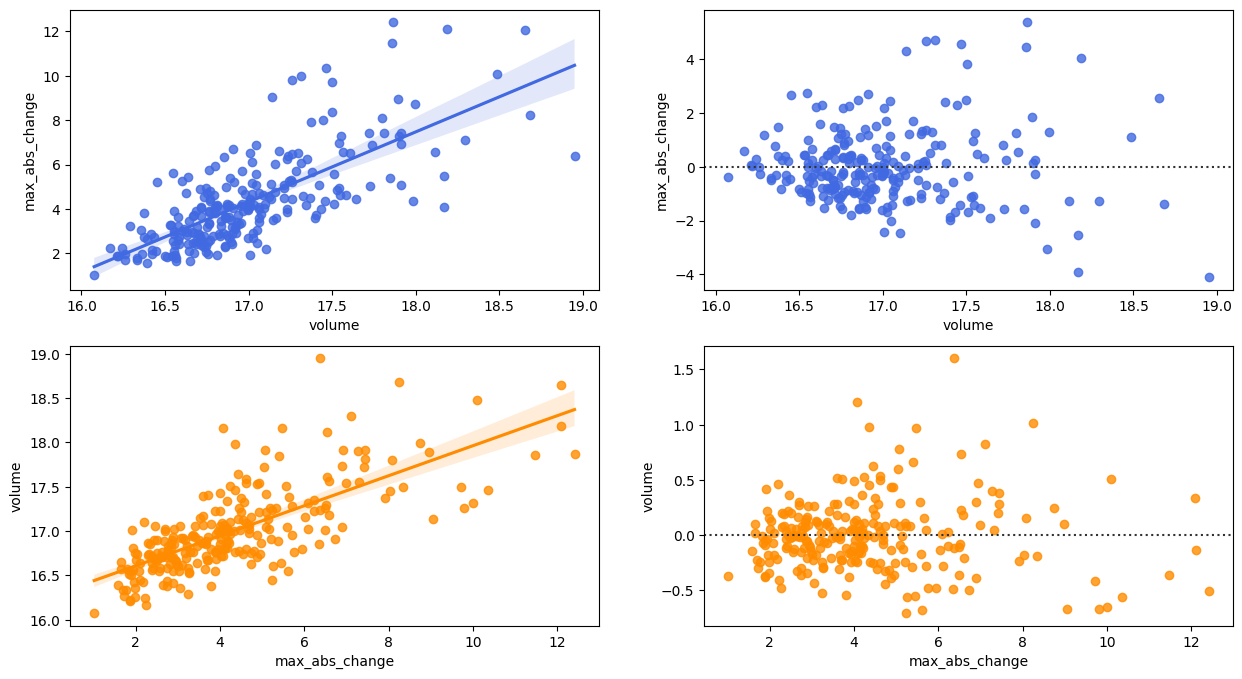

In [ ]:
# The reg_resid_plots() function from the reg_resid_plot.py module in this folder uses
# regplot() and residplot() from seaborn along with itertools to plot the regression and residuals side-by-side:

from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

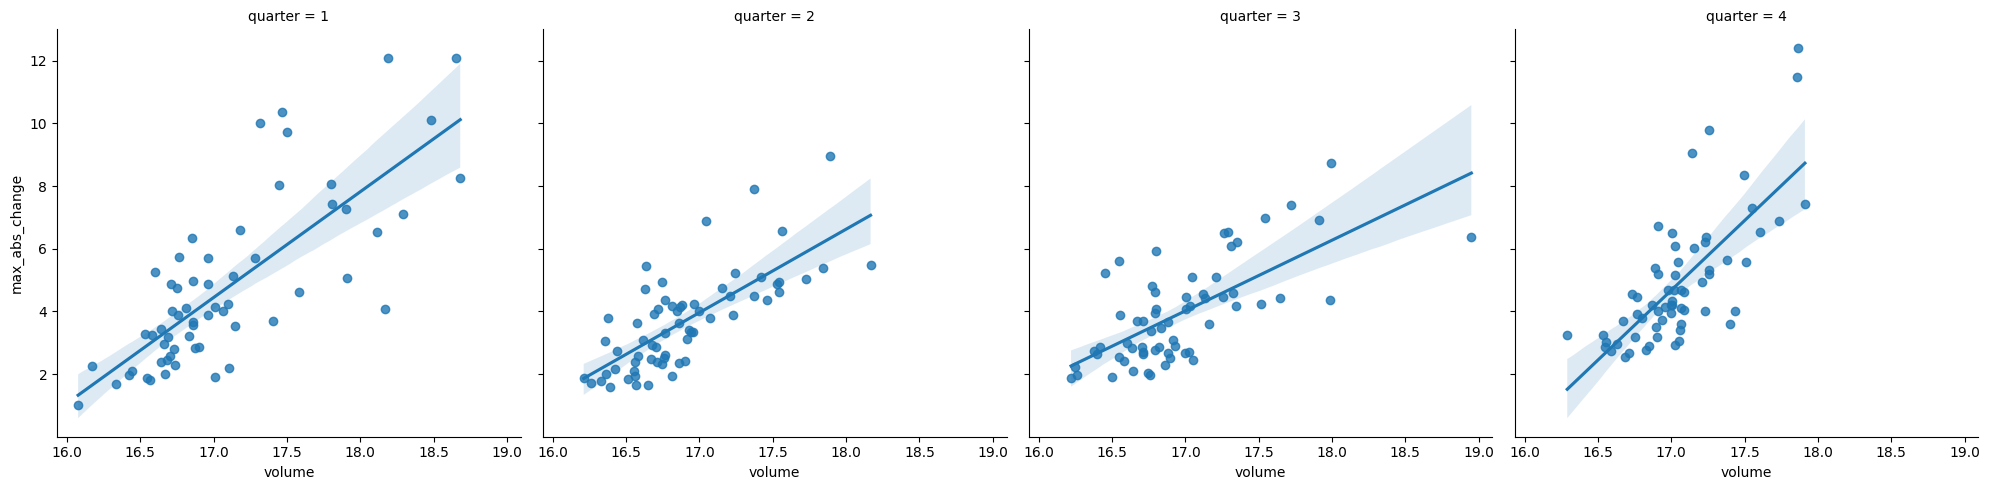

In [ ]:
# We can use lmplot() to split our regression across subsets of our data.
# For example, we can perform a regression per quarter on the Facebook stock data:

sns.lmplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low,
 quarter=lambda x: x.index.quarter),
 col='quarter'
)

Distributions

In [ ]:
# Boxenplot

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

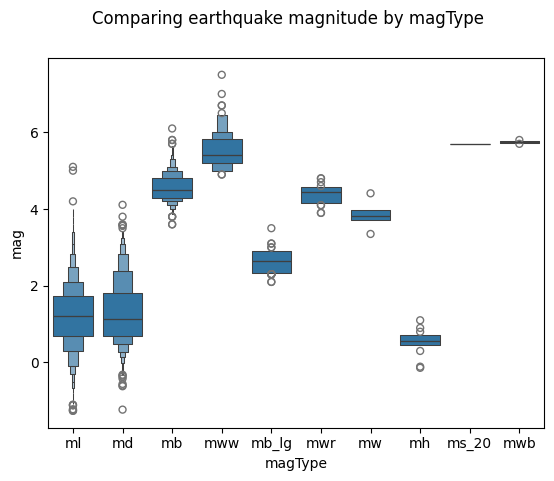

In [ ]:
# The boxenplot is a box plot that shows additional quantiles

sns.boxenplot(x='magType', y='mag', data=quakes[['magType', 'mag']])
plt.suptitle('Comparing earthquake magnitude by magType')

In [ ]:
# Violinplot

<ipython-input-62-3eed4115c982>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

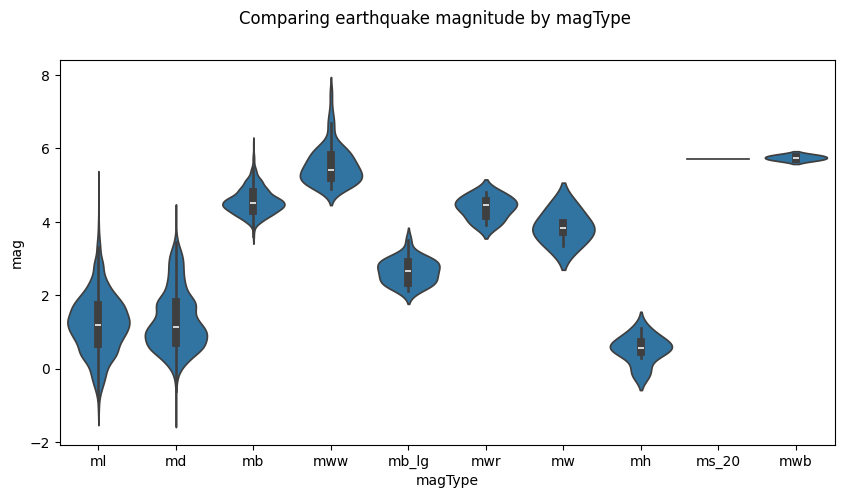

In [ ]:
# Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs

fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
  x='magType', y='mag', data=quakes[['magType', 'mag']],
  ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

Faceting

In [ ]:
# We can create subplots across subsets of our data by faceting.
# First, we create a FacetGrid specifying how to layout the plots (which categorical column goes along therows and which one along the columns).
# Then, we call the map() method of the FacetGrid and pass in the plotting function we want to use (along with any additional arguments).

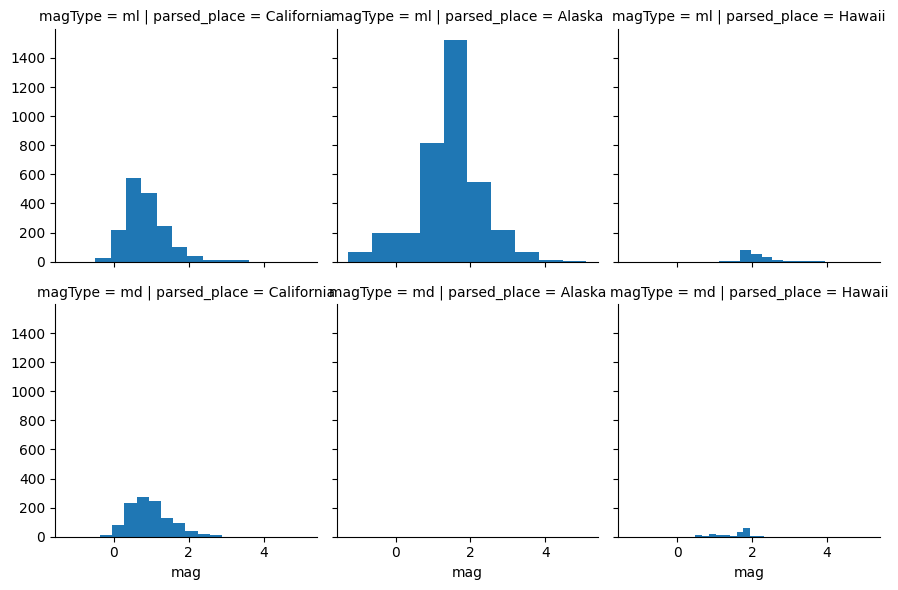

In [ ]:
# Let's make histograms showing the distribution of earthquake magnitude in California, Alaska, and Hawaii faceted by magType and parse_placed

g = sns.FacetGrid(
  quakes[
    (quakes.parsed_place.isin([
      'California', 'Alaska', 'Hawaii'
    ]))\
    & (quakes.magType.isin(['ml', 'md']))
  ],
  row='magType',
  col='parsed_place'
)
g = g.map(plt.hist, 'mag')

Formatting Plots

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

Titles and Axis Labels
* plt.suptitle() adds a title to plots and subplots
* plt.title() adds a title to a single plot
* plt.xlabel() labels the x-axis
* plt.ylabel() labels the y-axis

Text(0, 0.5, 'price ($)')

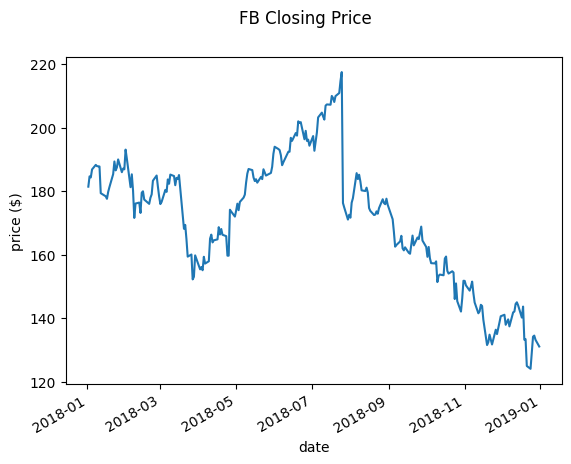

In [ ]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

In [ ]:
# plt.suptitle() vs. plt.title()

Text(0, 0.5, 'price ($)')

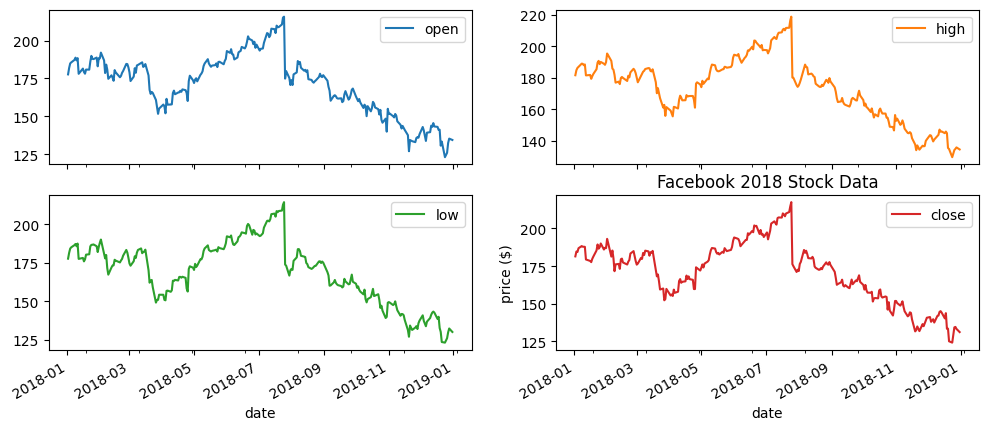

In [ ]:
# Check out what happens when we call plt.title() with subplots

fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

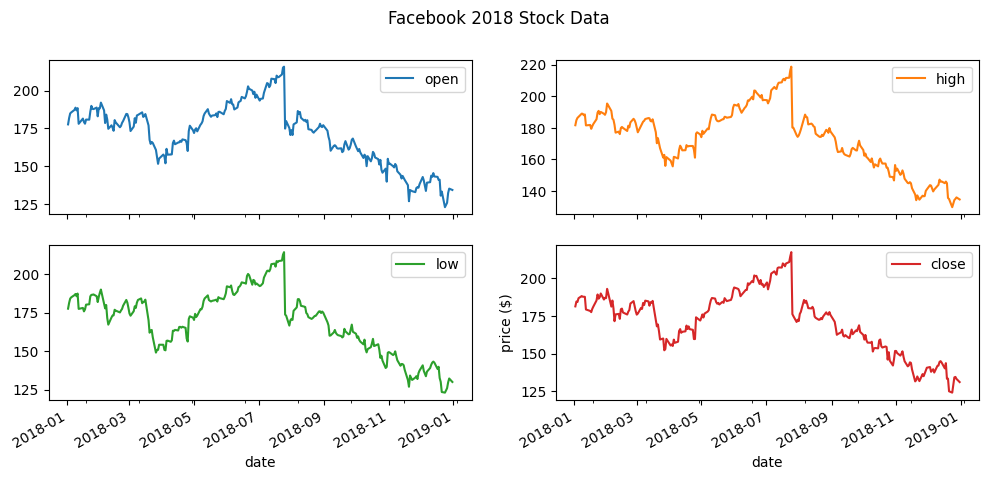

In [ ]:
# It's better to get into the habit of just using suptitle instead

fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Legends

Text(0, 0.5, 'price ($)')

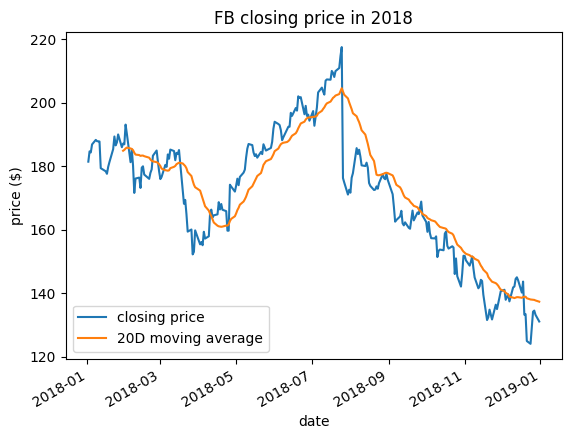

In [ ]:
# plt.legend() adds a legend to the plot. We can specify where to place it with the loparameter

fb.assign(
  ma=lambda x: x.close.rolling(20).mean()
).plot(
  y=['close', 'ma'],
  title='FB closing price in 2018',
  label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

Formatting Axes

In [ ]:
# Specifying axis limits

Text(0, 0.5, 'price ($)')

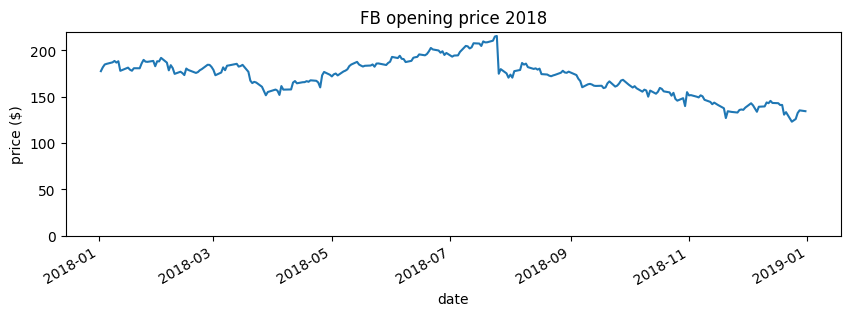

In [ ]:
# plt.xlim() and plt.ylim() can be used to specify the minimum and maximum values for the axis. Passing None will have matplotlib determine the limit

fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

In [ ]:
# Formatting the Axis Ticks

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

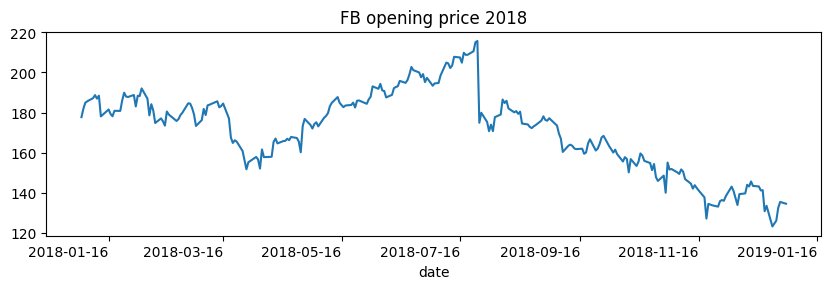

In [ ]:
# We can use plt.xticks() and plt.yticks() to provide tick labels and specify, which ticks to show. Here, we show every other month

import calendar

fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15, calendar.month_name[1::2])
plt.ylabel('price ($)')

Using Ticker

In [ ]:
# PercentFormatter

Text(0, 0.5, 'percent of highest price ($218.62)')

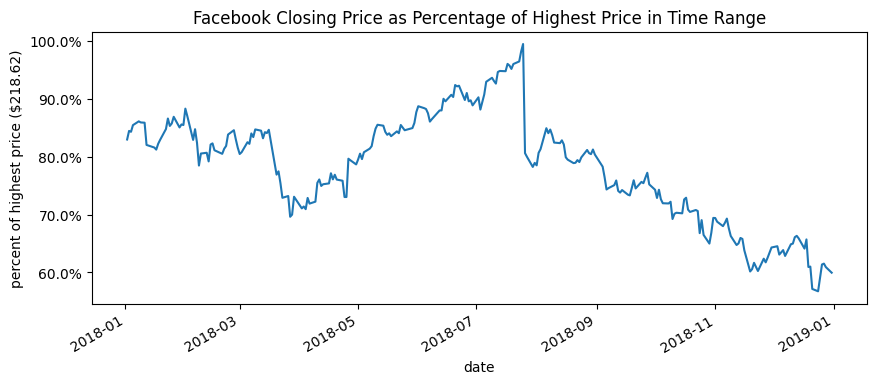

In [ ]:
# We can use ticker.PercentFormatter and specify the denominator ( xmax ) to use when calculating the percentages.
# This gets passed to the set_major_formatter() method of the x-axis or y-axis on the Axes

import matplotlib.ticker as ticker
ax = fb.close.plot(
  figsize=(10, 4),
  title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
  ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
  fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

In [ ]:
# MultipleLocator

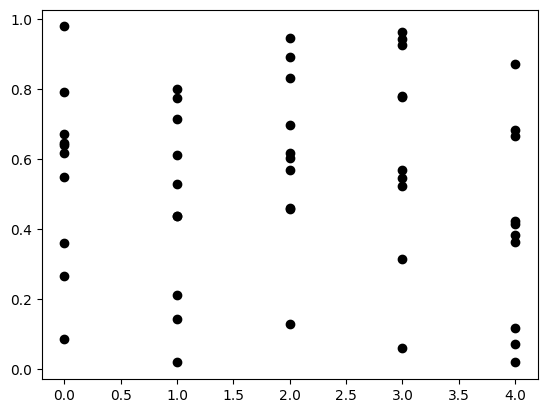

In [ ]:
# Say we have the following data. The points only take on integer values for x

fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

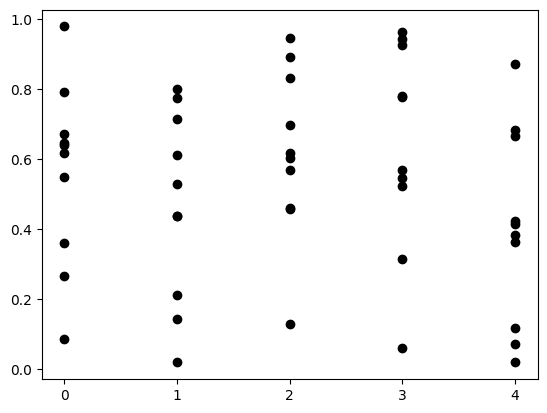

In [ ]:
# If we don't want to show decimal values on the x-axis, we can use the MultipleLocator.
# This will give ticks for all multiples of a number specified with the baseparameter.
# To get integer values, we use base=1

fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
  ticker.MultipleLocator(base=1)
)

Customize Visualizations

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

In [ ]:
# Scatter Matrix

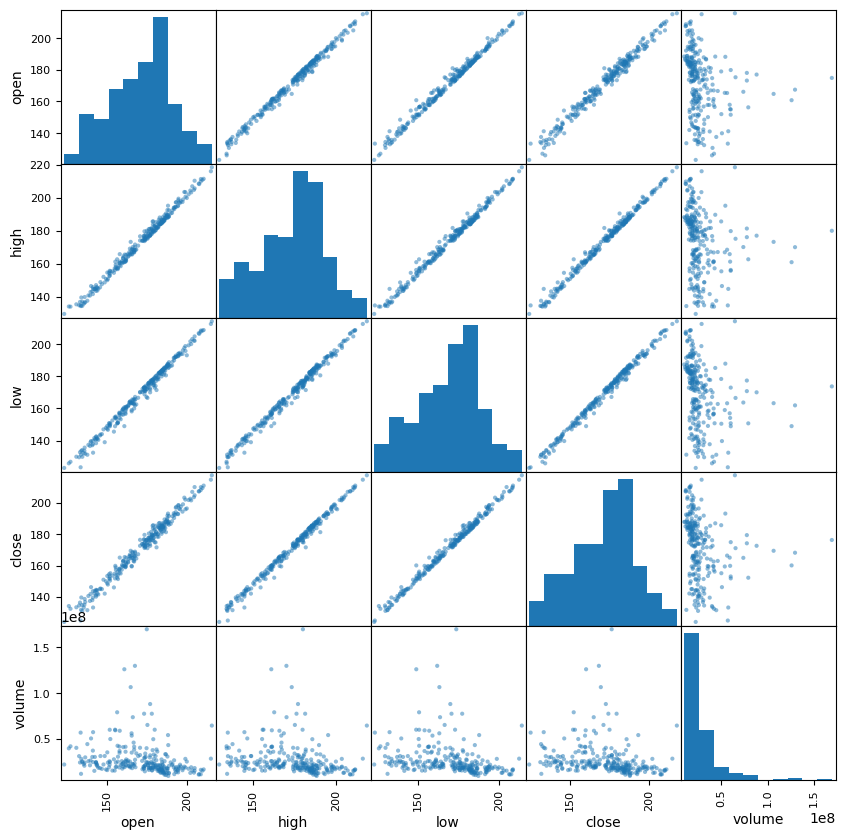

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10));

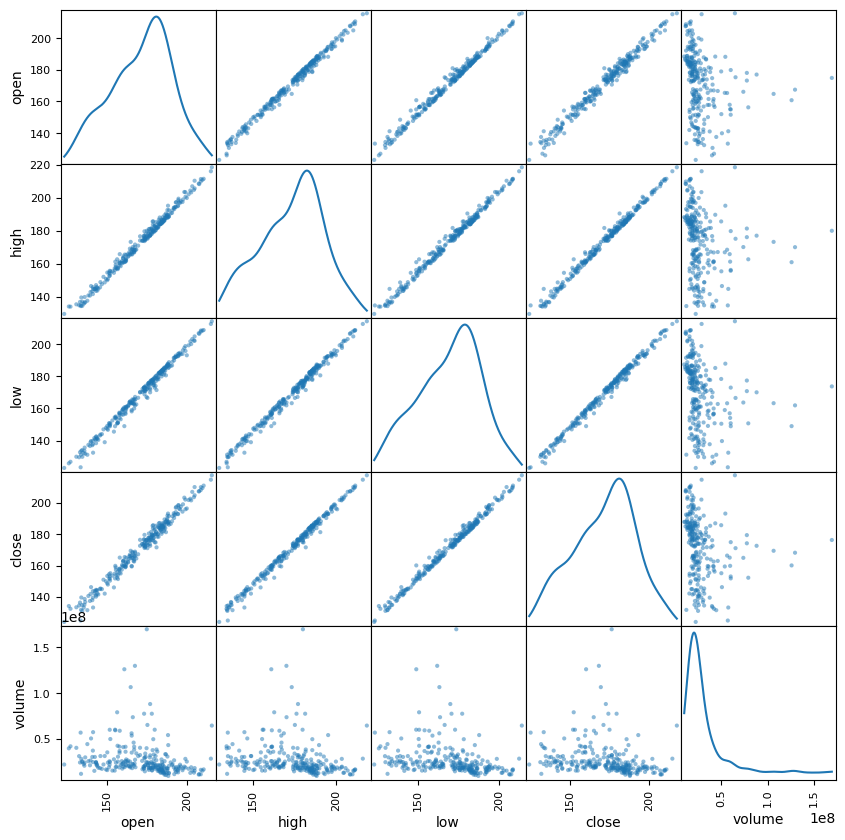

In [ ]:
# Changing the diagonal from histogram to KDE

scatter_matrix(fb, figsize=(10, 10), diagonal='kde');

In [ ]:
# Lag plots

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

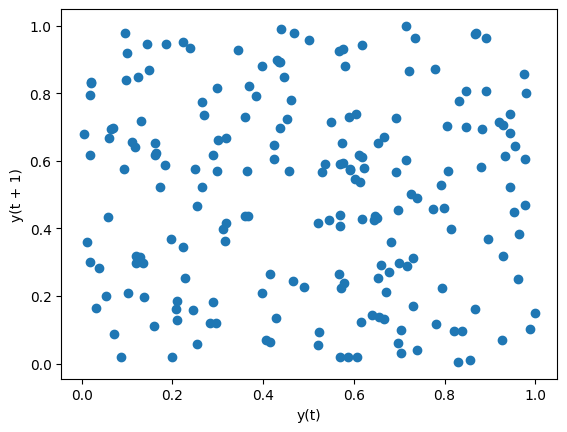

In [ ]:
# Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern

from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

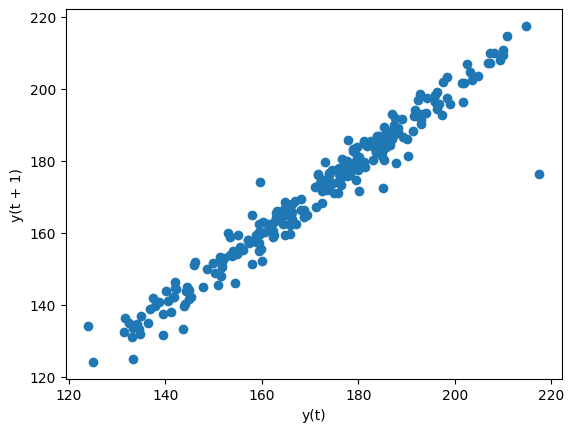

In [ ]:
# Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated

lag_plot(fb.close)

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

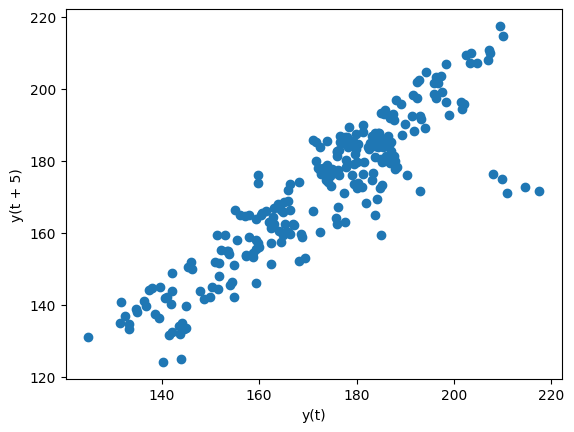

In [ ]:
# The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag

lag_plot(fb.close, lag = 5)

In [ ]:
# Autocorrelation Plots

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

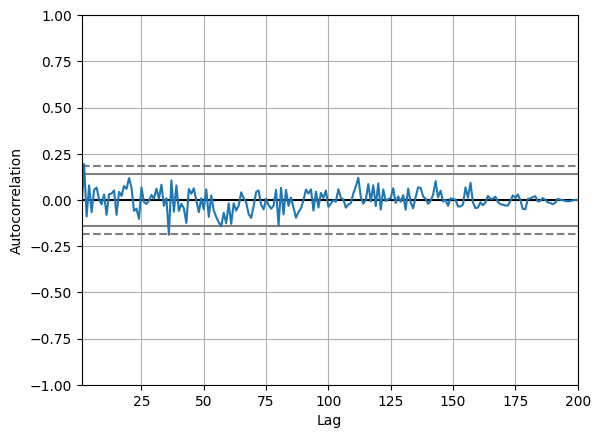

In [ ]:
# We can use the autocorrelation plot to see if this relationship may be meaningful or just noise.
# Random data will not have any significant autocorrelation

from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

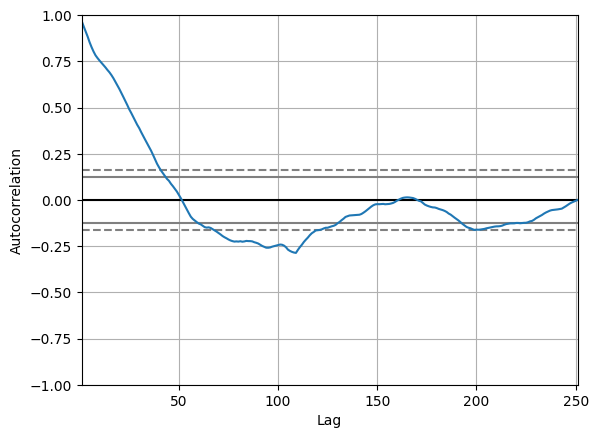

In [ ]:
# Stock data, on the other hand, does have significant autocorrelation

autocorrelation_plot(fb.close)

In [ ]:
# Bootstrap Plot

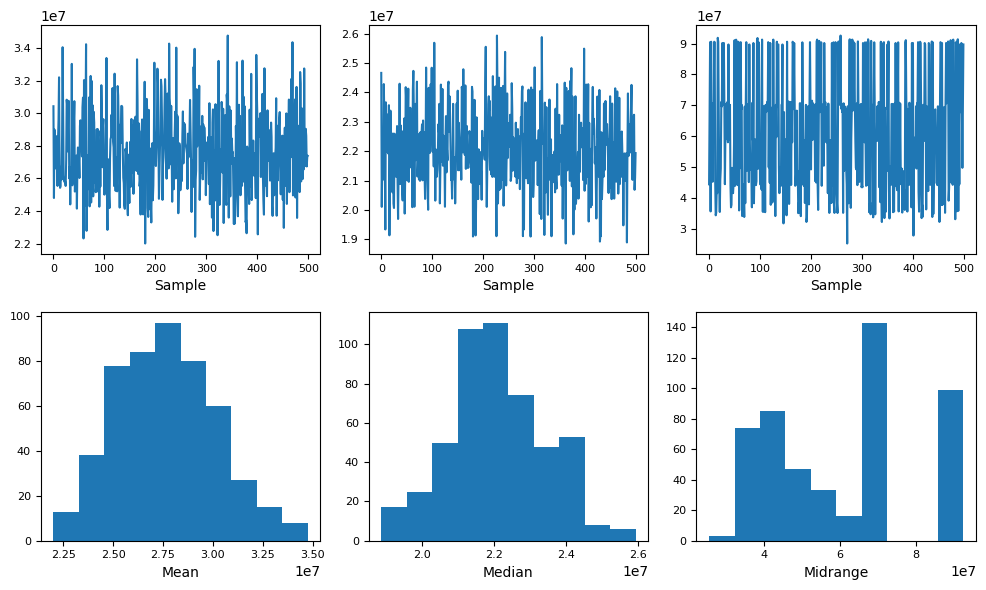

In [ ]:
# This plot helps us understand the uncertainty in our summary statistics

from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

# Supplementary

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [16]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('earthquakes.csv')

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

<Axes: >

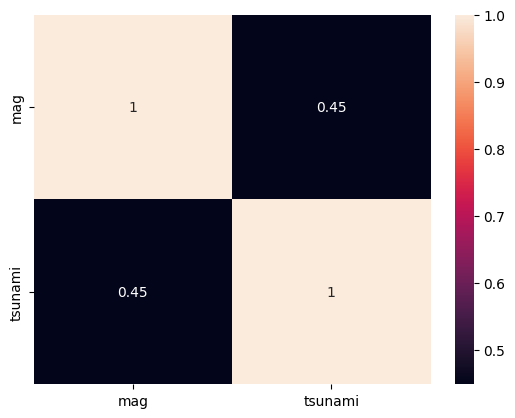

In [17]:
# I will make a query to filter the magType
# Then only extract the mag and tsunami column
# Then sort the index
# Proceed with the heatmap

sns.heatmap(
 quakes.query('magType == "mb"')[['mag','tsunami']].sort_index().corr(),annot=True)

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

In [19]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [48]:
lower_volume = fb.volume.quantile(0.25)- (1.5 * (fb.volume.quantile(0.75) - fb.volume.quantile(0.25)))
lower_volume

np.float64(-899775.0)

AttributeError: 'Axes' object has no attribute 'hxlines'

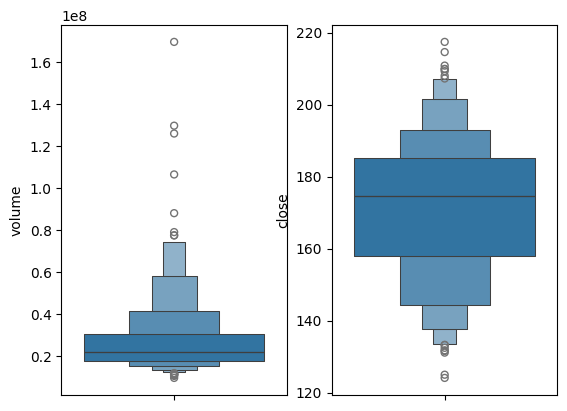

In [50]:
f, subs = plt.subplots(1, 2)
sns.boxenplot(y = 'volume', data = fb[['volume', 'close']], orient = 'v', ax = subs[0])
sns.boxenplot(y = 'close', data = fb[['volume', 'close']], orient = 'v', ax = subs[1])

# Make bounds (Q1 - 1.5 * IQR and Q3 + 1.5 * IQR)
lower_volume = fb.volume.quantile(0.25)- (1.5 * (fb.volume.quantile(0.75) - fb.volume.quantile(0.25)))
higher_volume = fb.volume.quantile(0.75)+ (1.5 * (fb.volume.quantile(0.75) - fb.volume.quantile(0.25)))
lower_close = fb.close.quantile(0.25)- (1.5 * (fb.close.quantile(0.75) - fb.close.quantile(0.25)))
higher_close = fb.close.quantile(0.75)+ (1.5 * (fb.close.quantile(0.75) - fb.close.quantile(0.25)))

subs[0].hxlines(fb[['volume', 'close']], 1, 2) # Test

3. Fill in the area between the bounds in the plot from exercise #2.

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

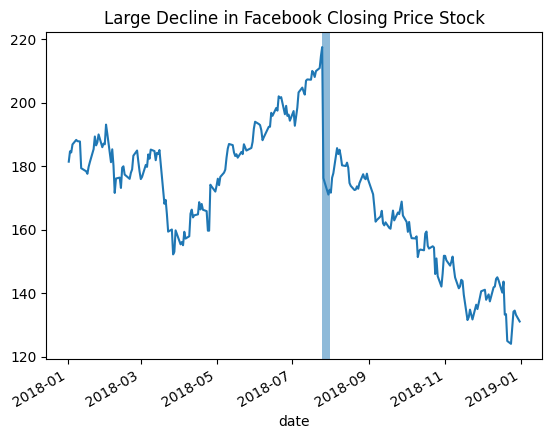

In [62]:
fb.close.plot(title = 'Large Decline in Facebook Closing Price Stock').axvspan('2018-07-25','2018-07-31', alpha = 0.5)

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
* Disappointing user growth announced after close on July 25, 2018
* Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
* FTC launches investigation on March 20, 2018

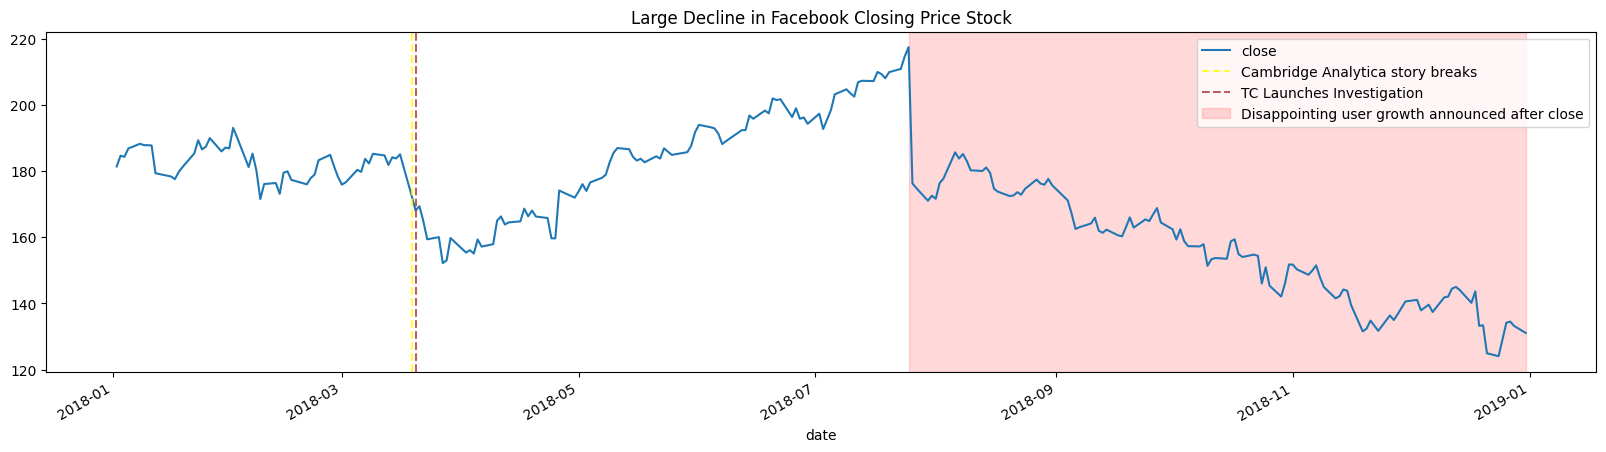

In [71]:
# Use axvline and axvspan for the highlights of the dates
fb.close.plot(title = 'Large Decline in Facebook Closing Price Stock', figsize = (20, 5)
).axvline('2018-03-19',alpha = 0.75, color = 'yellow', linestyle = '--', label = 'Cambridge Analytica story breaks')
plt.axvline('2018-03-20', alpha = 0.75, color = 'brown', linestyle = '--', label = 'TC Launches Investigation')
plt.axvspan('2018-07-25', fb.index.max(), alpha = 0.15, color = 'red', label = 'Disappointing user growth announced after close')
plt.legend(loc = 'upper right')

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

Conclusion

In this activity, I was able to learn some Seaborn syntaxes. I learned that some syntax also works the same as matplot, including passing of dataframe transformation into it. I want to learn more about this, considering I didn't finish the supplementary activity.